In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Configuración visual
plt.style.use("ggplot")
sns.set(font_scale=1.1)

In [31]:
#Carga de datos
data_path = r'C:\Users\james\OneDrive\Documentos\PREGRADO UPAO\CICLO 9\Tesis I\BackEnds\EduForgeF\EduForge\data\StudentPerformanceFactors.csv'
df = pd.read_csv(data_path)

In [32]:
#Inspeccion inicial
print("Dimensiones:", df.shape)
print("\nPrimeras filas:")
df.head()

Dimensiones: (6607, 23)

Primeras filas:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,name_student,degree,behavior
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Positive,3,No,High School,Near,Male,67,student_1,fourth,70
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Negative,4,No,College,Moderate,Female,61,student_2,third,75
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Neutral,4,No,Postgraduate,Near,Male,74,student_3,first,96
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Negative,4,No,High School,Moderate,Male,71,student_4,first,83
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Neutral,4,No,College,Near,Female,70,student_5,fourth,55


In [33]:
# Verificamos el tipo de datos y valores nulos
print("\nTipos de datos:")
df.info()

print("\nValores nulos:")
df.isnull().sum()


Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              660

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
name_student                   0
degree                         0
behavior                       0
dtype: int64

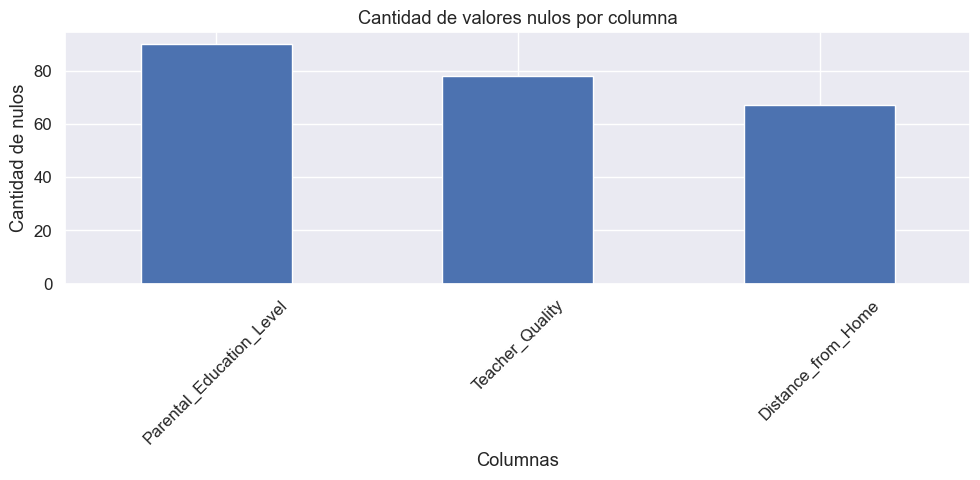

In [34]:
null_counts = df.isnull().sum()

# Filtrar solo columnas con nulos
null_counts = null_counts[null_counts > 0]

# Visualizar valores nulos
plt.figure(figsize=(10, 5))
null_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Cantidad de valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de nulos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Transformar notas de 0–100 a 0–20
if 'Exam_Score' in df.columns:
    df['Exam_Score'] = df['Exam_Score'] * 0.2

if 'Previous_Scores' in df.columns:
    df['Previous_Scores'] = df['Previous_Scores'] * 0.2

if 'behavior' in df.columns:
    df['behavior'] = df['behavior'] * 0.2

df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,name_student,degree,behavior
0,23,84,Low,High,No,7,14.6,Low,Yes,0,...,Positive,3,No,High School,Near,Male,13.4,student_1,fourth,14.0
1,19,64,Low,Medium,No,8,11.8,Low,Yes,2,...,Negative,4,No,College,Moderate,Female,12.2,student_2,third,15.0
2,24,98,Medium,Medium,Yes,7,18.2,Medium,Yes,2,...,Neutral,4,No,Postgraduate,Near,Male,14.8,student_3,first,19.2
3,29,89,Low,Medium,Yes,8,19.6,Medium,Yes,1,...,Negative,4,No,High School,Moderate,Male,14.2,student_4,first,16.6
4,19,92,Medium,Medium,Yes,6,13.0,Medium,Yes,3,...,Neutral,4,No,College,Near,Female,14.0,student_5,fourth,11.0


In [36]:
# Verificamos la stadísticas descriptivas
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,behavior
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,15.014106,1.493719,2.967610,13.447132,13.886212
std,5.990594,11.547475,1.46812,2.879957,1.230570,1.031231,0.778091,3.462978
min,1.000000,60.000000,4.00000,10.000000,0.000000,0.000000,11.000000,8.000000
25%,16.000000,70.000000,6.00000,12.600000,1.000000,2.000000,13.000000,10.800000
50%,20.000000,80.000000,7.00000,15.000000,1.000000,3.000000,13.400000,14.000000
75%,24.000000,90.000000,8.00000,17.600000,2.000000,4.000000,13.800000,16.800000
max,44.000000,100.000000,10.00000,20.000000,8.000000,6.000000,20.200000,19.800000


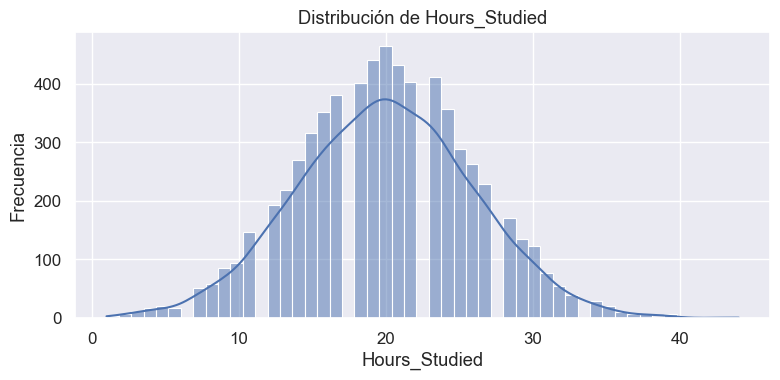

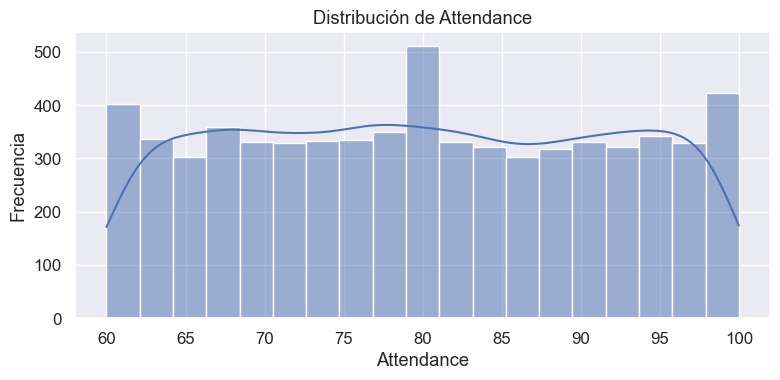

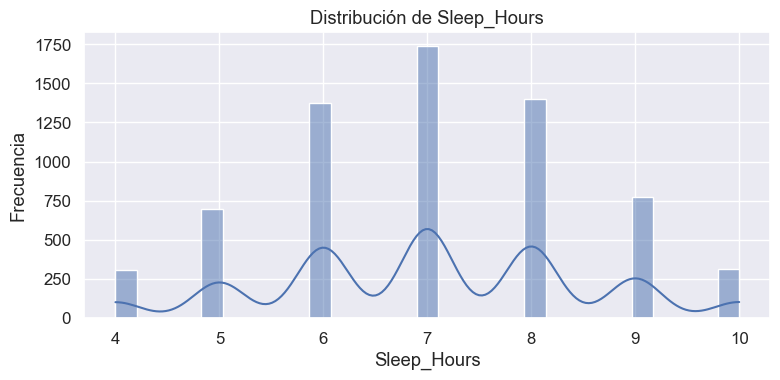

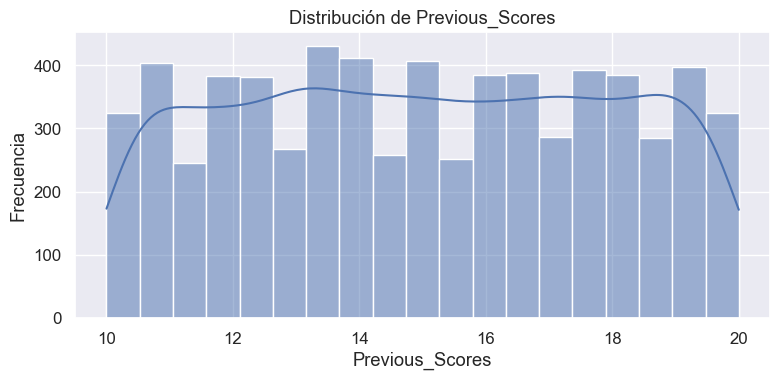

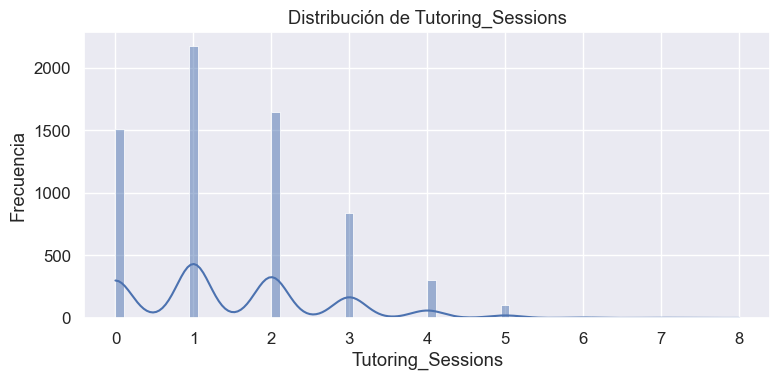

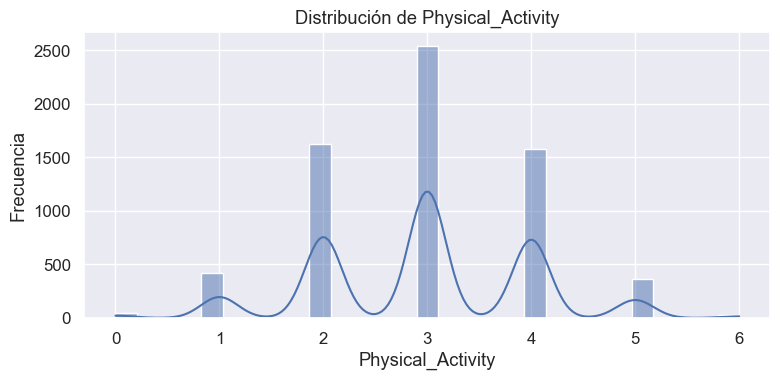

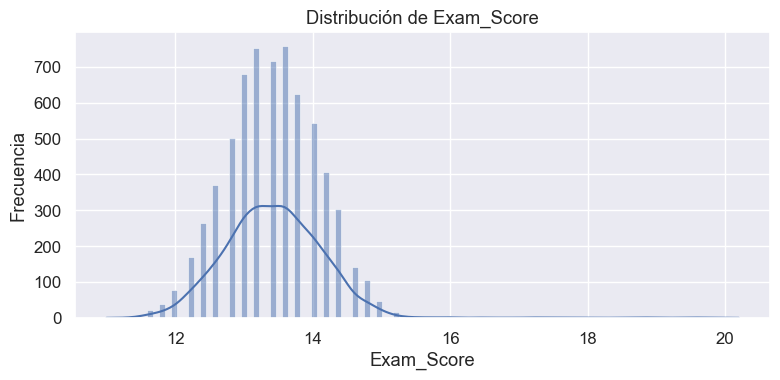

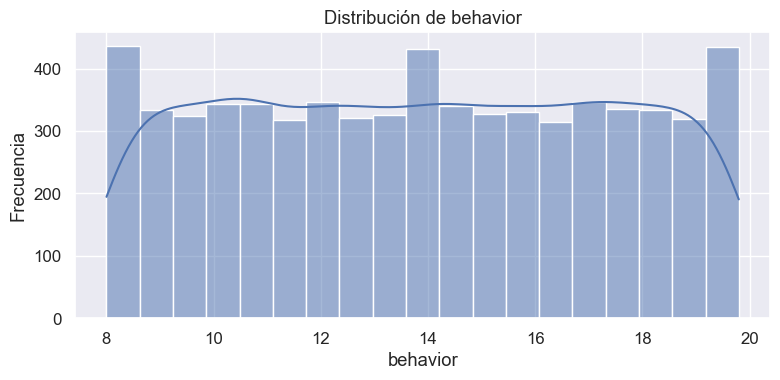

In [37]:
#Análisis de distribución de variables numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


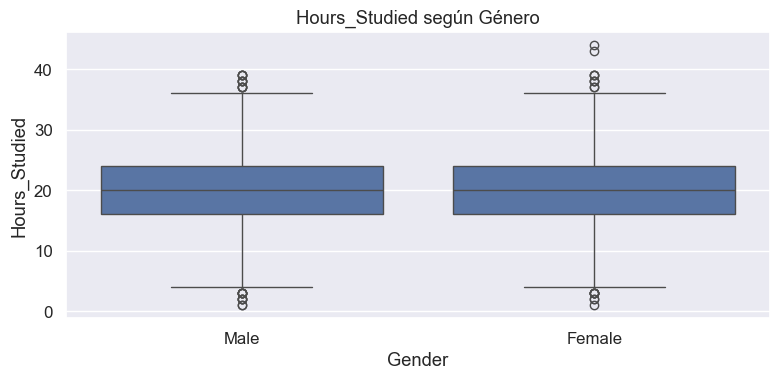

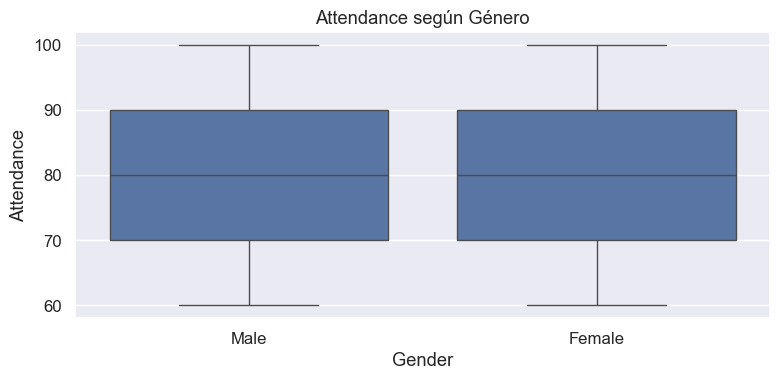

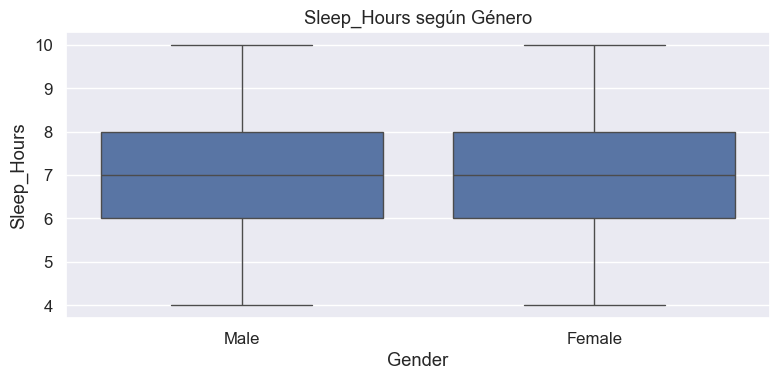

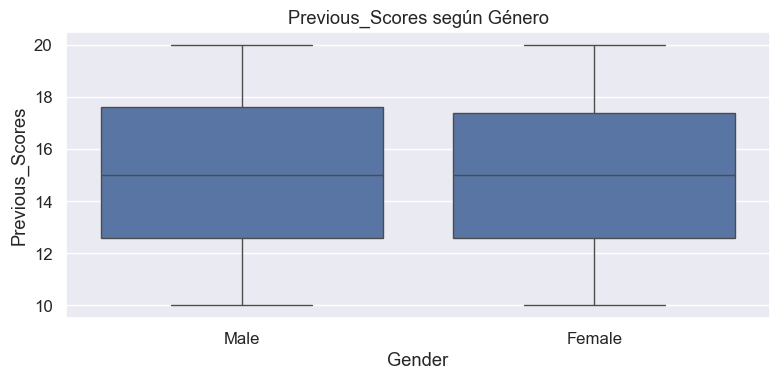

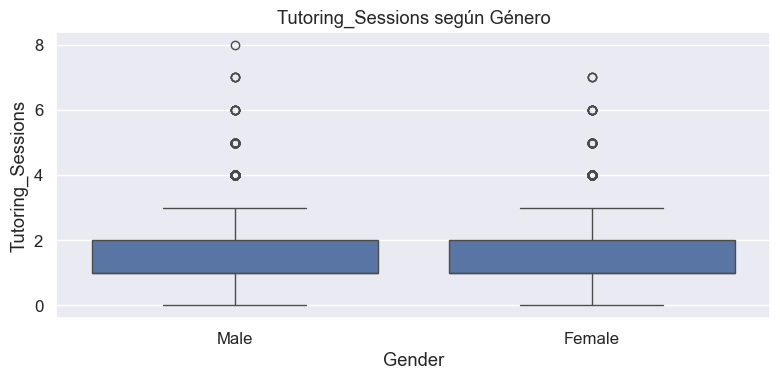

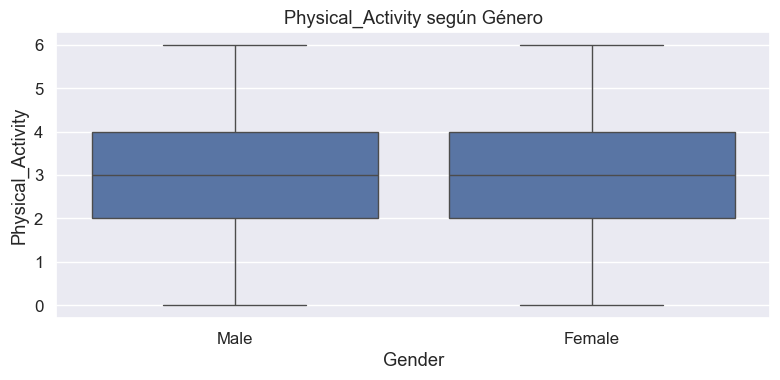

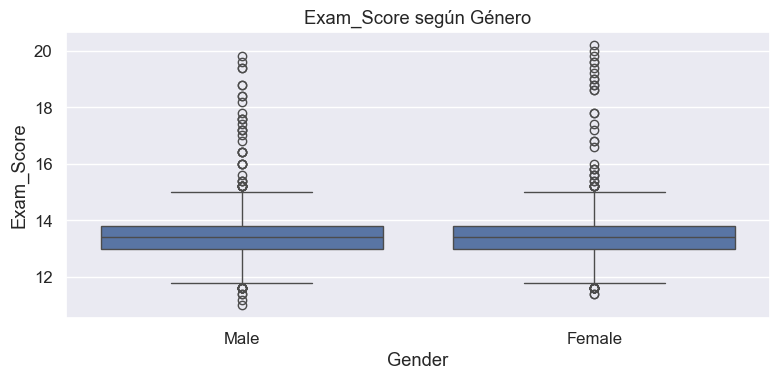

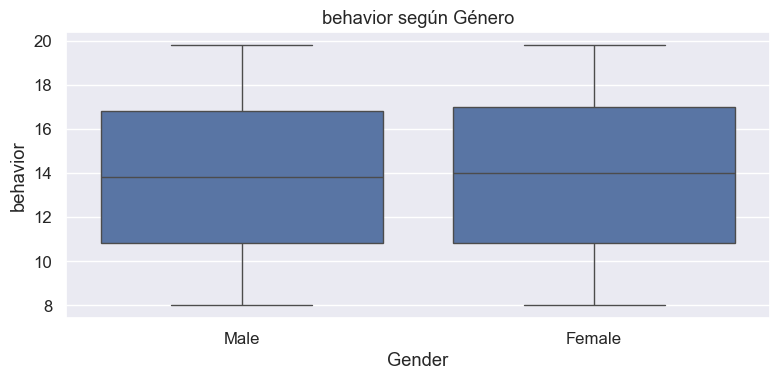

In [38]:
 # Boxplots por género
if 'Gender' in df.columns:
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x='Gender', y=col)
        plt.title(f'{col} según Género')
        plt.tight_layout()
        plt.show()

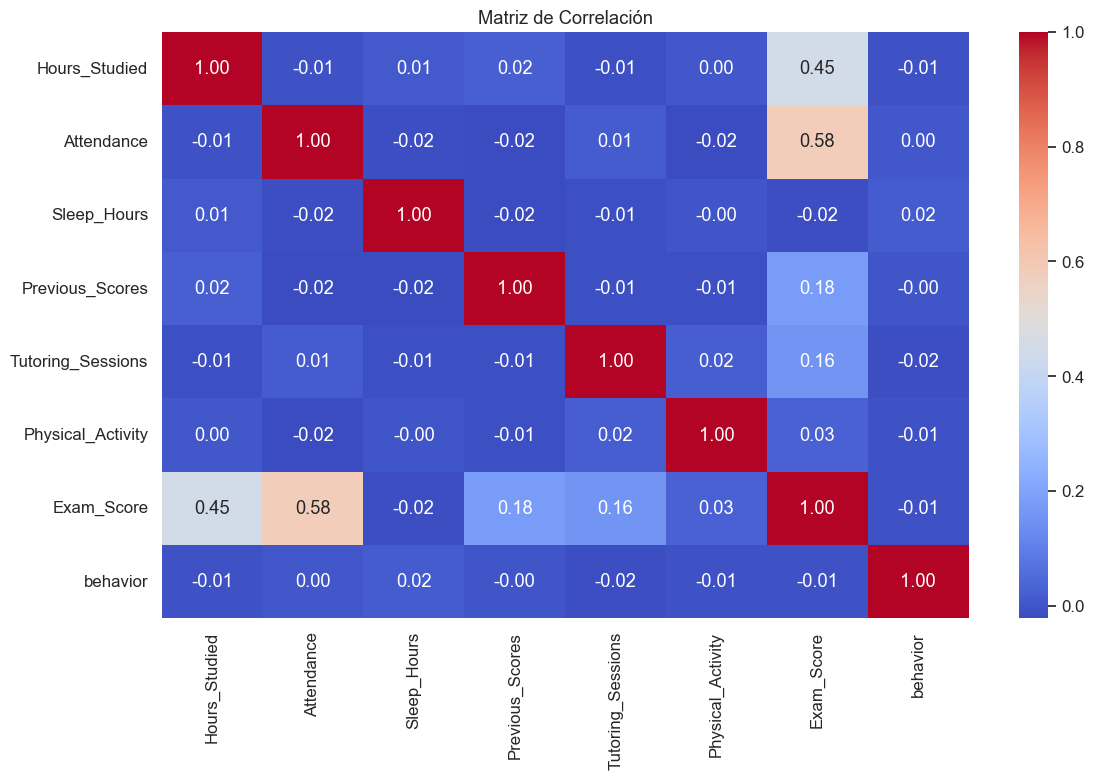

In [39]:
# Correlación entre variables
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

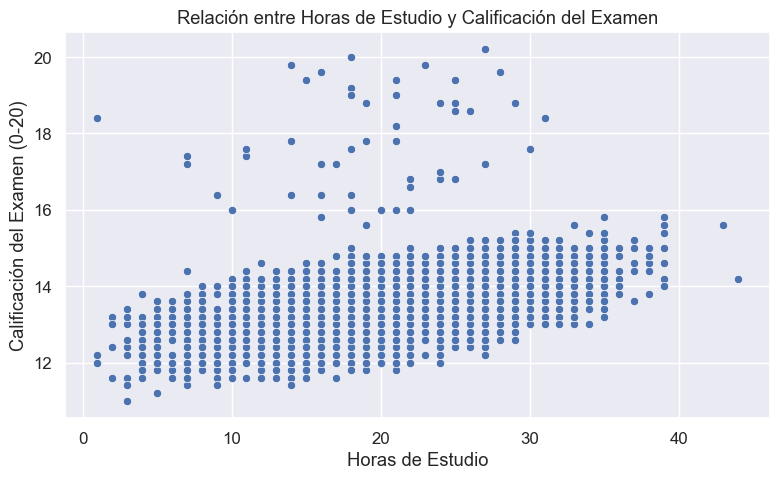

In [40]:
# Relación entre horas de estudio y calificación del examen
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Relación entre Horas de Estudio y Calificación del Examen")
plt.xlabel("Horas de Estudio")
plt.ylabel("Calificación del Examen (0-20)")
plt.tight_layout()
plt.show()


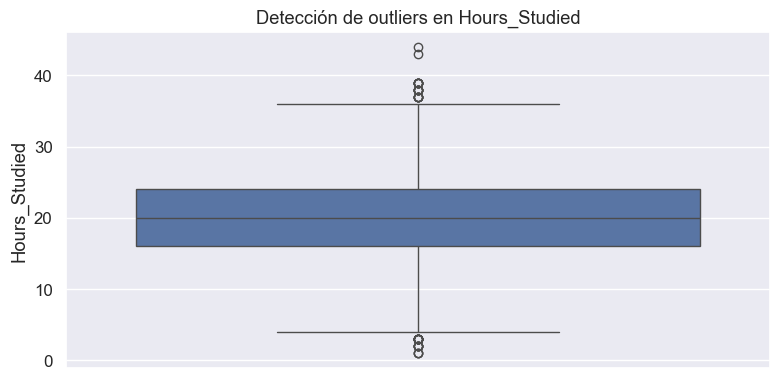

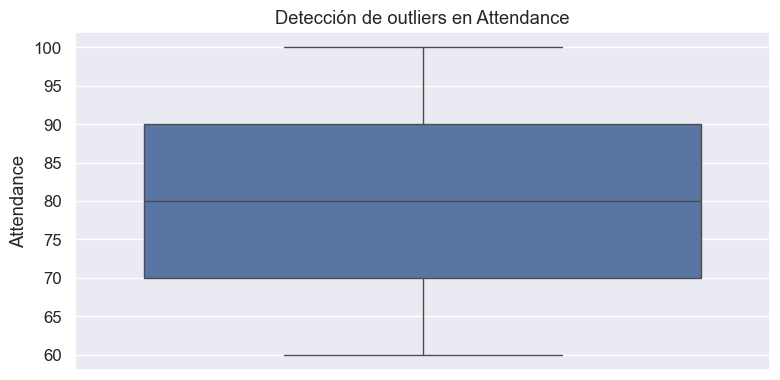

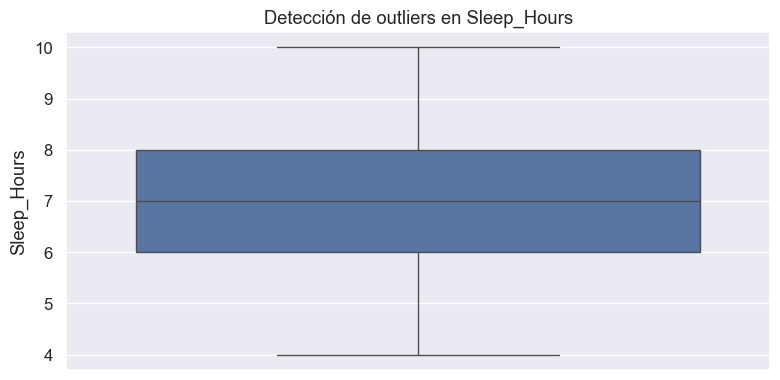

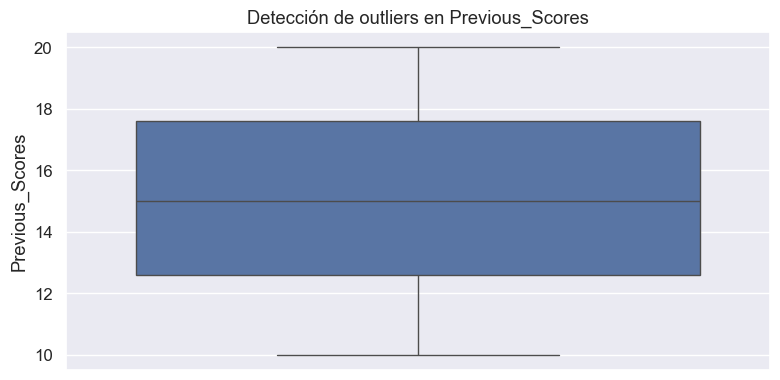

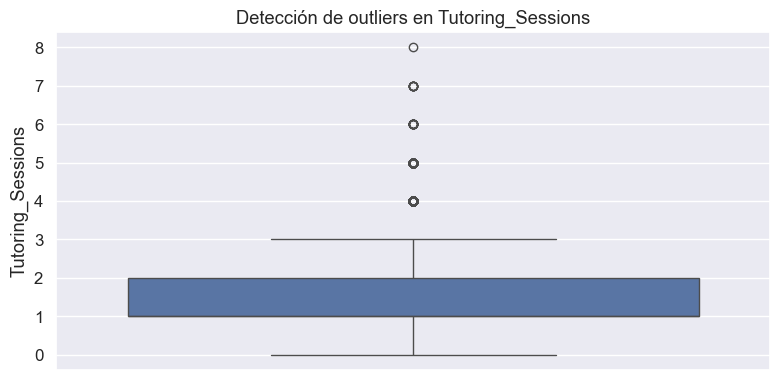

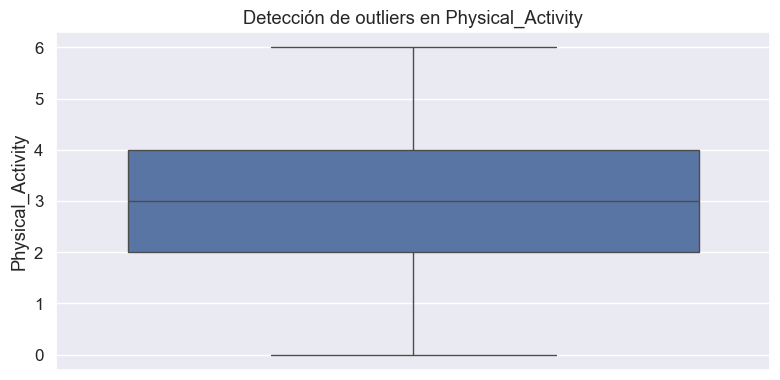

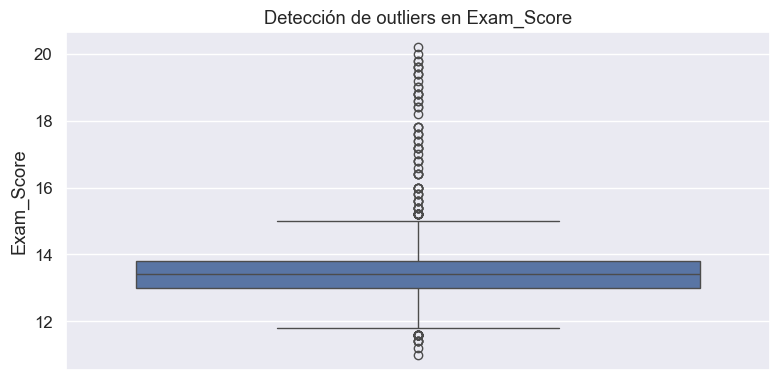

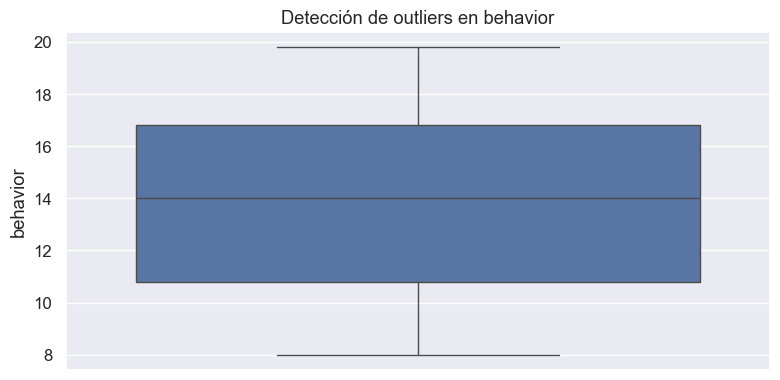

In [41]:
# Valores atípicos (outliers visuales)
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Detección de outliers en {col}')
    plt.tight_layout()
    plt.show()

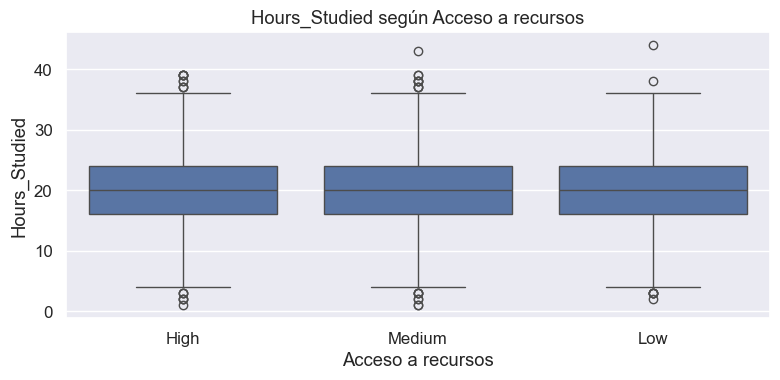

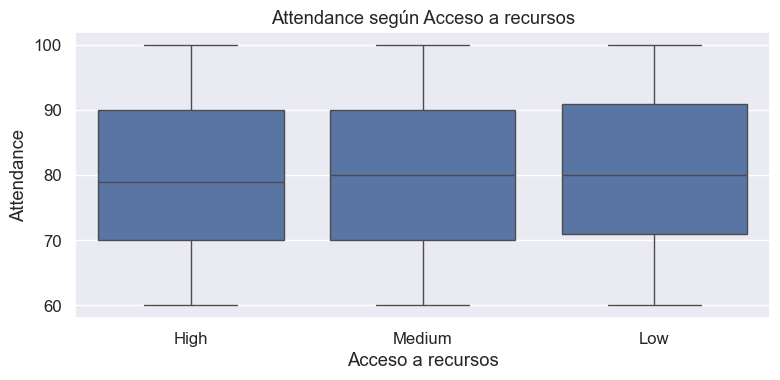

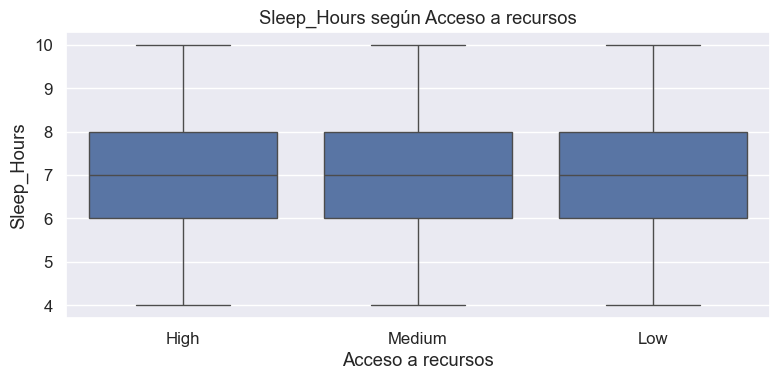

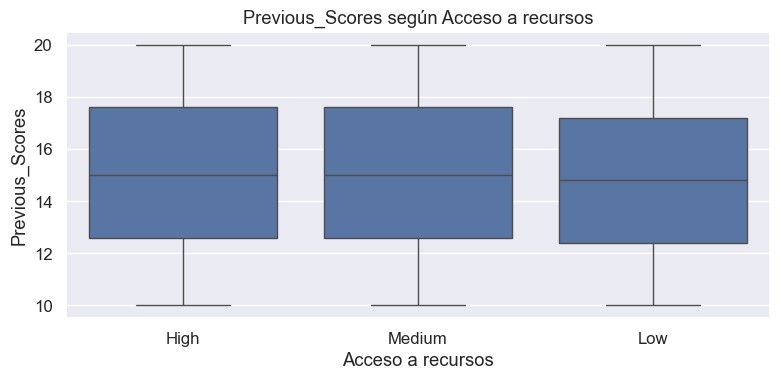

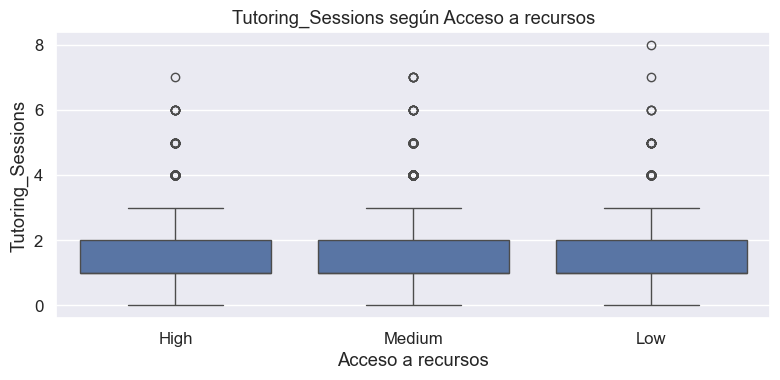

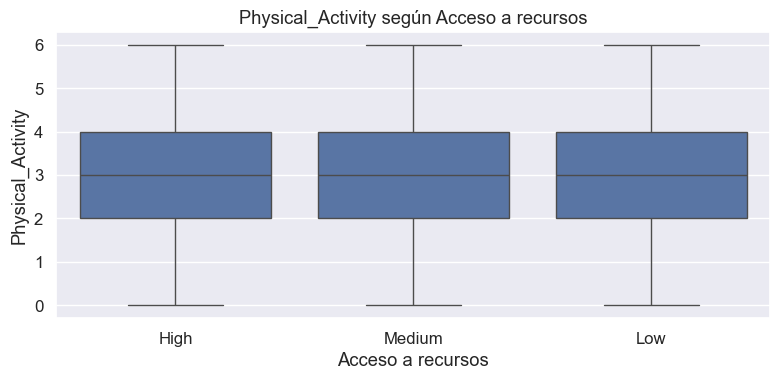

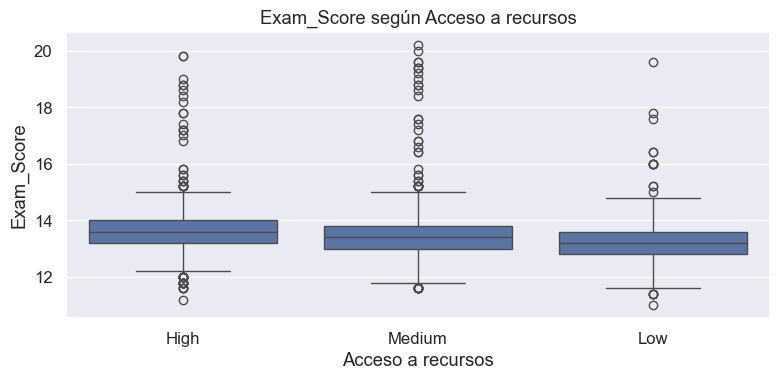

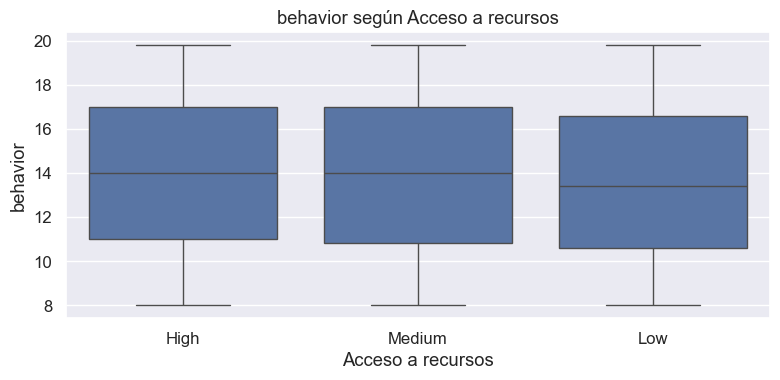

In [42]:
# Visualización por categoría: Acceso a recursos
if 'Access_to_Resources' in df.columns:
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x='Access_to_Resources', y=col)
        plt.title(f'{col} según Acceso a recursos')
        plt.xlabel("Acceso a recursos")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()